<a href="https://colab.research.google.com/github/hetshree999/CE081_SDP_Lab11/blob/master/ML_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples = 100, centers=3, n_features=2, cluster_std=0.2, random_state=0)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(X)

In [ ]:
# Get the cluster centeroid
centers = kmeans.cluster_centers_

In [ ]:
#Get the cluster labels
labels = kmeans.labels_

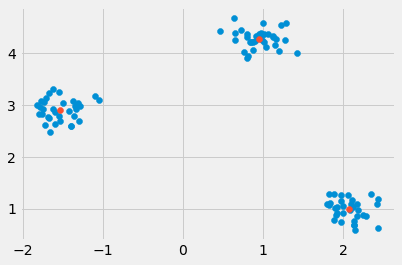

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(centers[:,0], centers[:,1])

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels)
print(score)

0.8816040239688525


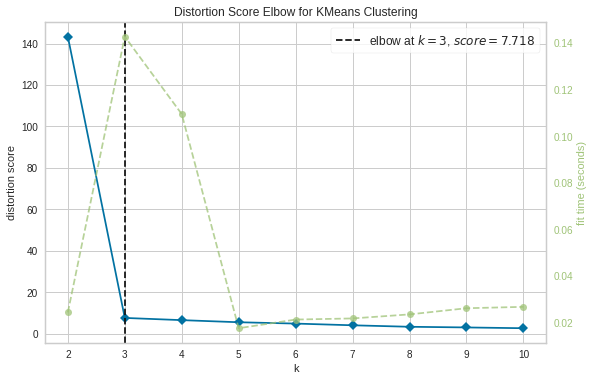

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
elb_visualizer = KElbowVisualizer(kmeans)
elb_visualizer.fit(X)    
elb_visualizer.show() 

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


array([1], dtype=int32)

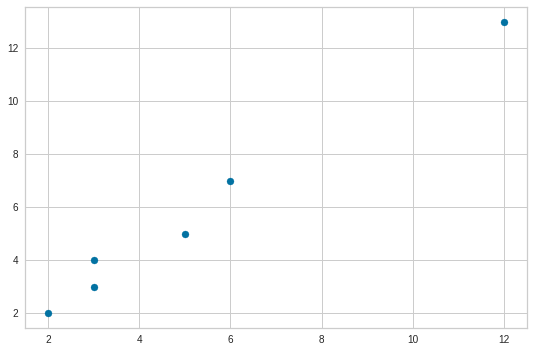

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
X1 = np.array([[2,2],[3,4],[6,7],[5,5],[3,3],[12,13]])
#X1.shape()
X2 = np.array([2,3,4])
plt.scatter(X1[:,0], X1[:,1])
centroid = np.array([[2,2],[3,4],[6,7]])
kmeans = KMeans(n_clusters=3, init=centroid).fit(X1)
kmeans.cluster_centers_
kmeans.labels_
#print("Number of iterations " , kmeans.n_iter_)
kmeans.predict([[8,8]])

# print("Accuracy : ", accuracy_score(labels_test,pred))

#Handwritten Digit Recognization

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
#digits dataset from scikit learn consists of 8x8 pixel images of digits
#Data plotting and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
digits = load_digits()

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
digits.data[0:3]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [ ]:
# from sklearn.preprocessing import scale
# data = scale(digits.data)
# (n_samples, n_features) = 1797, 64
# def bench_k_means(estimator, name, data):
#     estimator.fit(data)
#     print(1)

# bench_k_means(KMeans(init='k-means++', n_clusters=10, n_init=10),name="k-means++", data=data)
kmean_Y = KMeans(n_clusters=10, random_state=0).fit(digits.data)
print(kmean_Y.labels_)

[5 7 7 ... 7 3 3]


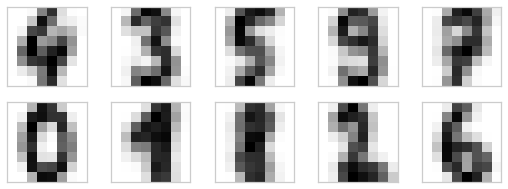

In [ ]:
fig, ax = plt.subplots(2, 5, figsize = (8,3)) 
centers = kmean_Y.cluster_centers_.reshape(10,8,8)

for axi, center in zip(ax.flat, centers):
  axi.set(xticks = [], yticks = [])
  axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary)

In [ ]:
clusters = digits.target

labels_Y = np.zeros_like(clusters) # blank labels
print(f"The labels are : {labels_Y}")
print(f"\nThe size of labels is : {labels_Y.shape}")
print("The mask values are : ")
for i in range(10):
  mask = (clusters == i)  
  print(mask)
  labels_Y[mask] = mode(digits.target[mask])[0]

The labels are : [0 0 0 ... 0 0 0]

The size of labels is : (1797,)
The mask values are : 
[ True False False ... False False False]
[False  True False ... False False False]
[False False  True ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ...  True False  True]
[False False False ... False  True False]


In [ ]:
import numpy as np
import math as m
import copy

def findindex(item):
  mini = 1000000
  index = 0
  n = len(item)
  for a in range(n):
    if(item[a]<mini):
      mini = item[a]
      index = a

  return index

def Euclidian_Dist(p1,p2):
  x = len(p1)
  dist = 0
  for i in range(x):
    dist = dist + (p1[i]-p2[i])*(p1[i]-p2[i])
  dist = m.sqrt(dist)
  return dist

def create_teble(it,c):
  items = np.zeros((8,2))
  l1 = len(c[0])
  l = len(it)
  for i in range(l):
    for j in range(l1):
      items[i][j] = Euclidian_Dist(it[i],c[j])
  return items

def assign_point_to_clusters(items,c,it):
  nc1 = np.zeros((8,2))
  nc2 = np.zeros((8,2))
  n = len(c)
  l = 0
  m = 0
  n1 = len(items)
  for i in range(n1):
    for j in range(n):
      if(findindex(items[i]) == j):
        if(j==0):
          nc1[l] = it[i]
          l = l + 1
        elif(j==1):
          nc2[m] = it[i]
          m = m + 1
  return nc1,nc2

def new_c_points(c,nc1,nc2):
  ac = copy.deepcopy(c)
  n1 = len(c[0])
  n = len(nc1)
  x = 0.0
  for i in range(n1):
    for j in range(n):
      x = x + nc1[j][i]
    ac[0][i] = (x/n)
    x = 0

  n2 = len(c[0]) 
  nk = len(nc2)
  y = 0.0
  for i in range(n2):
    for j in range(nk):
      y = y + nc2[j][i]
    ac[1][i] = (y/nk)
    y = 0
  return ac

def main(c):
  it = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
  # c = [[2,10],[5,8], [1,2]]
  items = create_teble(it,c)
  nc1 ,nc2 = assign_point_to_clusters(items,c,it)
  ac = new_c_points(c,nc1,nc2)
  print("Our New Cluster Heads are : ")
  print(ac)
  return ac


c = [[2,10],[5,8], [1,2]]

if __name__=="__main__":
  for i in range(3):
    # c = [[2,10],[5,8], [1,2]];
    c = main(c)


Our New Cluster Heads are : 
[[0.25, 1.25], [4.125, 4.625], [1, 2]]
Our New Cluster Heads are : 
[[0.125, 0.25], [4.25, 5.625], [1, 2]]
Our New Cluster Heads are : 
[[0.125, 0.25], [4.25, 5.625], [1, 2]]
